In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_excel("/content/mediaMediana_2016_2024.xlsx")
df

,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2016-01-01,0.691667,950.637500,950.941667,950.312500,116.80,24.375000,21.495833,24.950000,23.804167,21.787500,21.112500,86.458333,80.791667,84.125000,78.125000,5.037500,2.166667
1,2016-01-02,0.416667,951.245833,951.541667,950.908333,24.95,24.745833,21.687500,25.454167,24.275000,22.112500,21.308333,86.208333,80.500000,83.708333,140.916667,5.495833,2.125000
2,2016-01-03,0.050000,950.916667,951.233333,950.650000,145.25,24.341667,21.600000,24.762500,23.975000,21.979167,21.225000,87.000000,82.791667,85.125000,160.833333,4.320833,1.925000
3,2016-01-04,0.791667,951.000000,951.300000,950.670833,122.95,24.908333,22.137500,25.550000,24.391667,22.533333,21.720833,87.541667,82.000000,85.125000,69.500000,3.812500,1.454167
4,2016-01-05,0.800000,951.650000,951.975000,951.354167,110.95,24.537500,21.929167,25.083333,24.029167,22.320833,21.495833,88.291667,82.625000,85.750000,116.541667,4.108333,1.904167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2024-09-26,0.016667,950.037500,950.225000,949.679167,22.50,27.679167,15.883333,28.845833,27.066667,16.275000,15.054167,52.791667,45.791667,50.625000,194.875000,6.770833,2.975000
3192,2024-09-27,0.000000,954.604167,954.891667,954.270833,37.80,22.408333,14.429167,22.995833,21.933333,15.054167,14.229167,67.000000,62.583333,64.125000,162.458333,8.662500,4.487500
3193,2024-09-28,0.000000,953.487500,953.787500,953.245833,54.65,25.525000,9.166667,26.075000,24.804167,9.820833,8.695833,40.125000,36.166667,37.875000,133.125000,5.883333,2.991667
3194,2024-09-29,0.000000,952.320833,952.650000,952.075000,50.00,28.816667,11.833333,29.429167,28.037500,12.250000,11.200000,38.125000,34.208333,36.333333,131.791667,7.466667,3.758333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   3196 non-null   datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       3196 non-null   float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  3196 non-null   float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        3196 non-null   float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       3196 non-null   float64       
 5   RADIACAO GLOBAL (Kj/m²)                                3196 non-null   float64       
 6   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           3196 non-null   float64       
 7   TEMPERATURA DO PONTO DE ORVALHO (°C)                   3196 non-null 

In [ ]:
df.describe()

,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
count,3196,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000
mean,2020-05-16 12:00:00,0.150535,953.053614,953.307167,952.790698,188.995119,24.248442,16.094951,24.938294,23.564809,16.628289,15.582670,66.690016,61.435075,64.081495,107.646772,5.832987,2.635567
min,2016-01-01 00:00:00,0.000000,942.416667,942.675000,942.112500,0.000000,7.870833,-5.537500,8.329167,7.350000,-5.091667,-5.945833,17.916667,15.000000,16.583333,17.000000,0.633333,0.000000
25%,2018-03-09 18:00:00,0.000000,951.011458,951.290625,950.737500,18.050000,22.870833,12.607292,23.503125,22.235417,13.178125,12.082292,55.666667,50.041667,52.916667,72.802083,4.583333,1.928125
50%,2020-05-16 12:00:00,0.000000,952.410417,952.710417,952.141667,81.600000,24.764583,17.410417,25.412500,24.016667,17.887500,16.958333,69.229167,63.583333,66.479167,103.666667,5.681250,2.641667
75%,2022-07-24 06:00:00,0.050000,954.917708,955.162500,954.641667,188.237500,26.458333,20.133333,27.162500,25.766667,20.654167,19.625000,79.083333,73.875000,76.458333,141.041667,6.967708,3.362500
max,2024-09-30 00:00:00,5.183333,964.700000,964.870833,964.387500,3370.700000,32.633333,24.750000,33.670833,31.837500,25.270833,24.070833,99.416667,97.833333,99.041667,360.000000,12.970833,7.291667
std,NaN,0.419579,3.040974,3.024345,3.055857,391.181884,3.479455,4.873253,3.529870,3.418463,4.836894,4.912385,15.802335,15.924805,15.922975,57.236871,1.860147,1.244197


In [ ]:
df.set_index('Data', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3196 entries, 2016-01-01 to 2024-09-30
Data columns (total 17 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       3196 non-null   float64
 1   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  3196 non-null   float64
 2   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        3196 non-null   float64
 3   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       3196 non-null   float64
 4   RADIACAO GLOBAL (Kj/m²)                                3196 non-null   float64
 5   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           3196 non-null   float64
 6   TEMPERATURA DO PONTO DE ORVALHO (°C)                   3196 non-null   float64
 7   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             3196 non-null   float64
 8   TEMPERATURA MÍNIMA NA HORA ANT

In [ ]:
df

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data,,,,,,,,,,,,,,,,,
2016-01-01,0.691667,950.637500,950.941667,950.312500,116.80,24.375000,21.495833,24.950000,23.804167,21.787500,21.112500,86.458333,80.791667,84.125000,78.125000,5.037500,2.166667
2016-01-02,0.416667,951.245833,951.541667,950.908333,24.95,24.745833,21.687500,25.454167,24.275000,22.112500,21.308333,86.208333,80.500000,83.708333,140.916667,5.495833,2.125000
2016-01-03,0.050000,950.916667,951.233333,950.650000,145.25,24.341667,21.600000,24.762500,23.975000,21.979167,21.225000,87.000000,82.791667,85.125000,160.833333,4.320833,1.925000
2016-01-04,0.791667,951.000000,951.300000,950.670833,122.95,24.908333,22.137500,25.550000,24.391667,22.533333,21.720833,87.541667,82.000000,85.125000,69.500000,3.812500,1.454167
2016-01-05,0.800000,951.650000,951.975000,951.354167,110.95,24.537500,21.929167,25.083333,24.029167,22.320833,21.495833,88.291667,82.625000,85.750000,116.541667,4.108333,1.904167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-26,0.016667,950.037500,950.225000,949.679167,22.50,27.679167,15.883333,28.845833,27.066667,16.275000,15.054167,52.791667,45.791667,50.625000,194.875000,6.770833,2.975000
2024-09-27,0.000000,954.604167,954.891667,954.270833,37.80,22.408333,14.429167,22.995833,21.933333,15.054167,14.229167,67.000000,62.583333,64.125000,162.458333,8.662500,4.487500
2024-09-28,0.000000,953.487500,953.787500,953.245833,54.65,25.525000,9.166667,26.075000,24.804167,9.820833,8.695833,40.125000,36.166667,37.875000,133.125000,5.883333,2.991667


<Axes: xlabel='Data'>

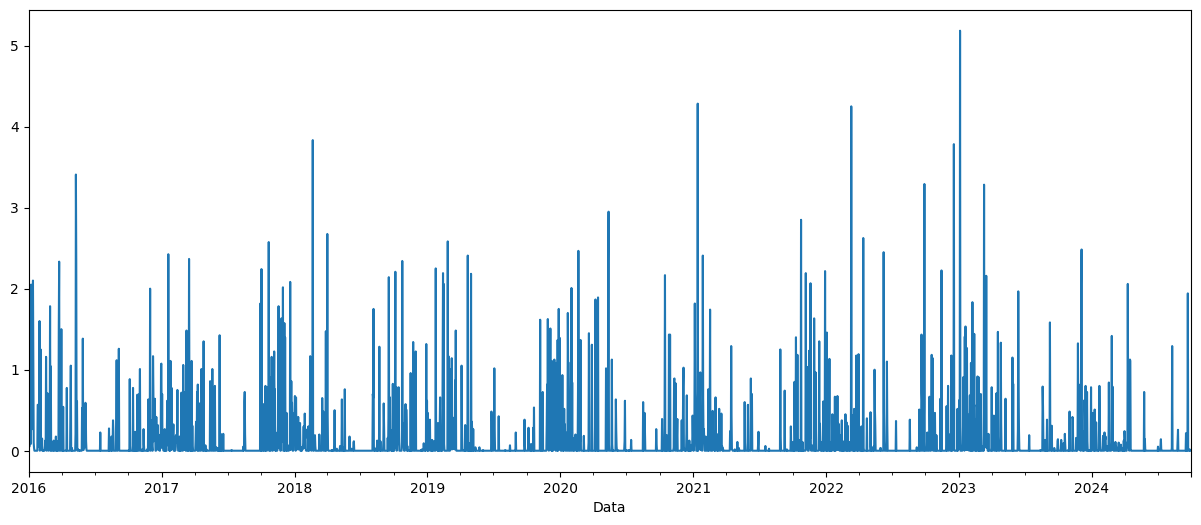

In [ ]:
df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].plot(figsize=(15,6))

Métodos Preditivos

NAIVE

In [ ]:
df['naive'] = df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].shift(1)
df.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",naive
Data,,,,,,,,,,,,,,,,,,
2016-01-01,0.691667,950.637500,950.941667,950.312500,116.80,24.375000,21.495833,24.950000,23.804167,21.787500,21.112500,86.458333,80.791667,84.125000,78.125000,5.037500,2.166667,NaN
2016-01-02,0.416667,951.245833,951.541667,950.908333,24.95,24.745833,21.687500,25.454167,24.275000,22.112500,21.308333,86.208333,80.500000,83.708333,140.916667,5.495833,2.125000,0.691667
2016-01-03,0.050000,950.916667,951.233333,950.650000,145.25,24.341667,21.600000,24.762500,23.975000,21.979167,21.225000,87.000000,82.791667,85.125000,160.833333,4.320833,1.925000,0.416667
2016-01-04,0.791667,951.000000,951.300000,950.670833,122.95,24.908333,22.137500,25.550000,24.391667,22.533333,21.720833,87.541667,82.000000,85.125000,69.500000,3.812500,1.454167,0.050000
2016-01-05,0.800000,951.650000,951.975000,951.354167,110.95,24.537500,21.929167,25.083333,24.029167,22.320833,21.495833,88.291667,82.625000,85.750000,116.541667,4.108333,1.904167,0.791667


<Axes: xlabel='Data'>

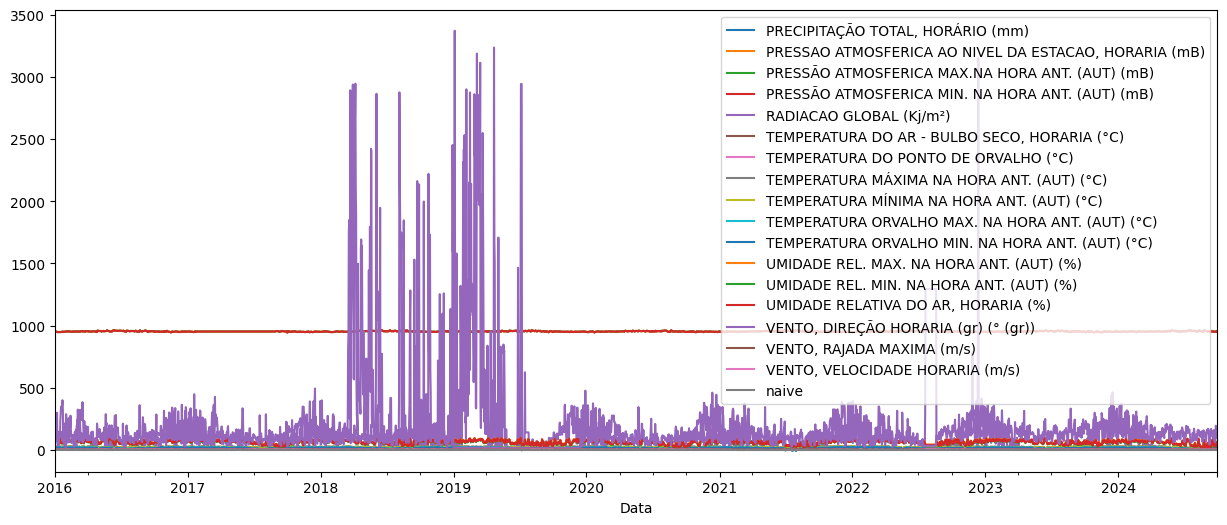

In [ ]:
df.plot(figsize=(15,6))

Validação do Naive

In [ ]:
MSE = ((df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] - df.naive) ** 2).mean()
print("MSE:", MSE) # Mean Squared Error (Erro quadrático médio)
MAE = (abs(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] - df.naive)).mean()
print("MAE:", MAE)  # Mean Absolute Error (Erro absoluto médio)

MSE: 0.31074006694487805
MAE: 0.23092592592592562


Modelo AutoRegressivo(AR)

In [ ]:
df['x1'] = df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].shift(1)
df.dropna(axis=0, inplace=True)
df.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",x1
Data,,,,,,,,,,,,,,,,,,
2016-01-02,0.416667,951.245833,951.541667,950.908333,24.95,24.745833,21.687500,25.454167,24.275000,22.112500,21.308333,86.208333,80.500000,83.708333,140.916667,5.495833,2.125000,0.691667
2016-01-03,0.050000,950.916667,951.233333,950.650000,145.25,24.341667,21.600000,24.762500,23.975000,21.979167,21.225000,87.000000,82.791667,85.125000,160.833333,4.320833,1.925000,0.416667
2016-01-04,0.791667,951.000000,951.300000,950.670833,122.95,24.908333,22.137500,25.550000,24.391667,22.533333,21.720833,87.541667,82.000000,85.125000,69.500000,3.812500,1.454167,0.050000
2016-01-05,0.800000,951.650000,951.975000,951.354167,110.95,24.537500,21.929167,25.083333,24.029167,22.320833,21.495833,88.291667,82.625000,85.750000,116.541667,4.108333,1.904167,0.791667
2016-01-06,0.558333,951.279167,951.637500,950.904167,105.95,24.495833,22.045833,24.991667,23.983333,22.475000,21.704167,89.000000,84.916667,86.875000,153.291667,3.800000,1.491667,0.800000


<Axes: xlabel='Data'>

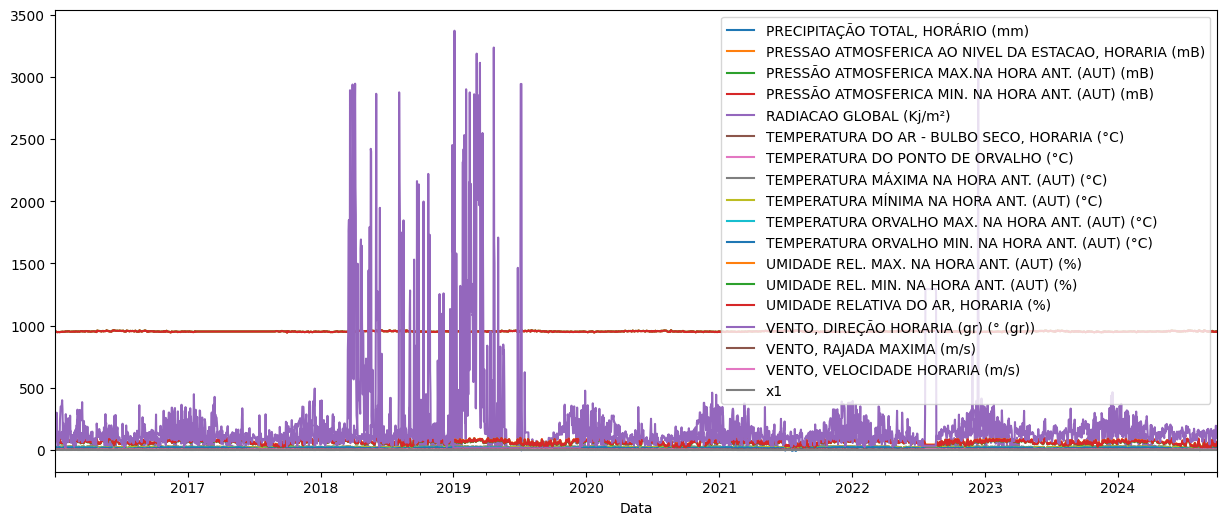

In [ ]:
df.plot(figsize=(15,6))

In [ ]:
x = df.x1.values
y = df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].values

reg = LinearRegression().fit(x.reshape(-1,1), y)
previsoes = reg.predict(x.reshape(-1,1))
MSE = ((y - previsoes) ** 2).mean()
print("MSE:", MSE)
MAE = np.abs(y - previsoes).mean()
print("MAE:", MAE)

MSE: 0.1735376814993131
MAE: 0.22445083688558076


Text(0, 0.5, 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)')

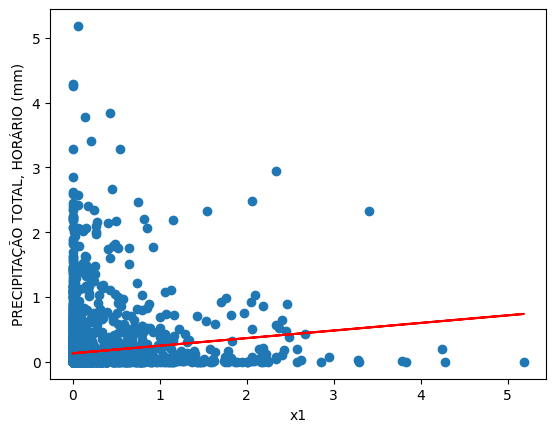

In [ ]:
plt.scatter(x, y)
plt.plot(x, reg.predict(x.reshape(-1, 1)), color='red')
plt.xlabel('x1')
plt.ylabel('PRECIPITAÇÃO TOTAL, HORÁRIO (mm)')

Autocorrelação total e parcial

In [ ]:
df = pd.read_excel("/content/mediaMediana_2016_2024.xlsx")
df.Data = pd.to_datetime(df.Data, dayfirst=True, errors='coerce')
df.set_index('Data', inplace=True)
df

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data,,,,,,,,,,,,,,,,,
2016-01-01,0.691667,950.637500,950.941667,950.312500,116.80,24.375000,21.495833,24.950000,23.804167,21.787500,21.112500,86.458333,80.791667,84.125000,78.125000,5.037500,2.166667
2016-01-02,0.416667,951.245833,951.541667,950.908333,24.95,24.745833,21.687500,25.454167,24.275000,22.112500,21.308333,86.208333,80.500000,83.708333,140.916667,5.495833,2.125000
2016-01-03,0.050000,950.916667,951.233333,950.650000,145.25,24.341667,21.600000,24.762500,23.975000,21.979167,21.225000,87.000000,82.791667,85.125000,160.833333,4.320833,1.925000
2016-01-04,0.791667,951.000000,951.300000,950.670833,122.95,24.908333,22.137500,25.550000,24.391667,22.533333,21.720833,87.541667,82.000000,85.125000,69.500000,3.812500,1.454167
2016-01-05,0.800000,951.650000,951.975000,951.354167,110.95,24.537500,21.929167,25.083333,24.029167,22.320833,21.495833,88.291667,82.625000,85.750000,116.541667,4.108333,1.904167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-26,0.016667,950.037500,950.225000,949.679167,22.50,27.679167,15.883333,28.845833,27.066667,16.275000,15.054167,52.791667,45.791667,50.625000,194.875000,6.770833,2.975000
2024-09-27,0.000000,954.604167,954.891667,954.270833,37.80,22.408333,14.429167,22.995833,21.933333,15.054167,14.229167,67.000000,62.583333,64.125000,162.458333,8.662500,4.487500
2024-09-28,0.000000,953.487500,953.787500,953.245833,54.65,25.525000,9.166667,26.075000,24.804167,9.820833,8.695833,40.125000,36.166667,37.875000,133.125000,5.883333,2.991667


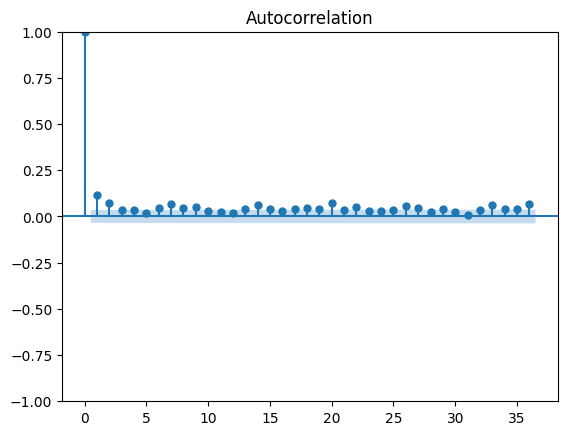

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']) #autocorrelação total (q)
plt.show()

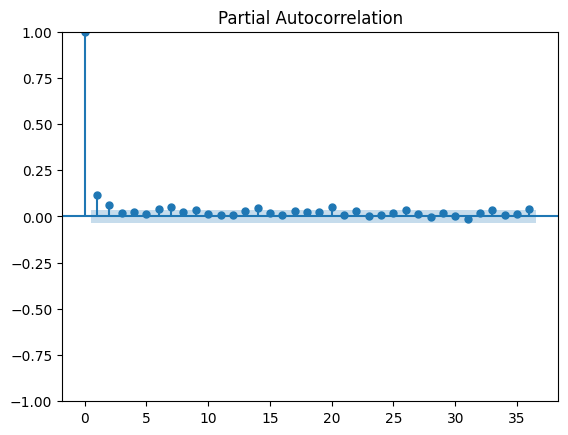

In [ ]:
plot_pacf(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']) #autocorrelação parcial (p)
plt.show()

Séries Temporais ARMA, ARIMA e SARIMA

In [ ]:
df = pd.read_excel("/content/mediaMediana_2016_2024.xlsx")
df.Data = pd.to_datetime(df.Data, dayfirst=True, errors='coerce')
df.set_index('Data', inplace=True)
df

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data,,,,,,,,,,,,,,,,,
2016-01-01,0.691667,950.637500,950.941667,950.312500,116.80,24.375000,21.495833,24.950000,23.804167,21.787500,21.112500,86.458333,80.791667,84.125000,78.125000,5.037500,2.166667
2016-01-02,0.416667,951.245833,951.541667,950.908333,24.95,24.745833,21.687500,25.454167,24.275000,22.112500,21.308333,86.208333,80.500000,83.708333,140.916667,5.495833,2.125000
2016-01-03,0.050000,950.916667,951.233333,950.650000,145.25,24.341667,21.600000,24.762500,23.975000,21.979167,21.225000,87.000000,82.791667,85.125000,160.833333,4.320833,1.925000
2016-01-04,0.791667,951.000000,951.300000,950.670833,122.95,24.908333,22.137500,25.550000,24.391667,22.533333,21.720833,87.541667,82.000000,85.125000,69.500000,3.812500,1.454167
2016-01-05,0.800000,951.650000,951.975000,951.354167,110.95,24.537500,21.929167,25.083333,24.029167,22.320833,21.495833,88.291667,82.625000,85.750000,116.541667,4.108333,1.904167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-26,0.016667,950.037500,950.225000,949.679167,22.50,27.679167,15.883333,28.845833,27.066667,16.275000,15.054167,52.791667,45.791667,50.625000,194.875000,6.770833,2.975000
2024-09-27,0.000000,954.604167,954.891667,954.270833,37.80,22.408333,14.429167,22.995833,21.933333,15.054167,14.229167,67.000000,62.583333,64.125000,162.458333,8.662500,4.487500
2024-09-28,0.000000,953.487500,953.787500,953.245833,54.65,25.525000,9.166667,26.075000,24.804167,9.820833,8.695833,40.125000,36.166667,37.875000,133.125000,5.883333,2.991667


<Axes: xlabel='Data'>

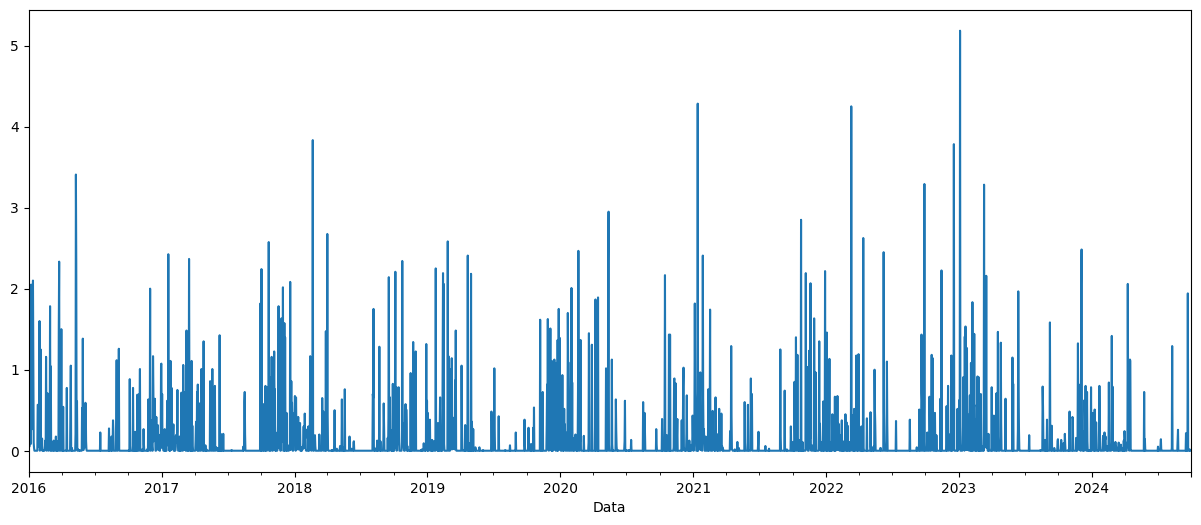

In [ ]:
df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].plot(figsize=(15,6))

<Axes: xlabel='Data'>

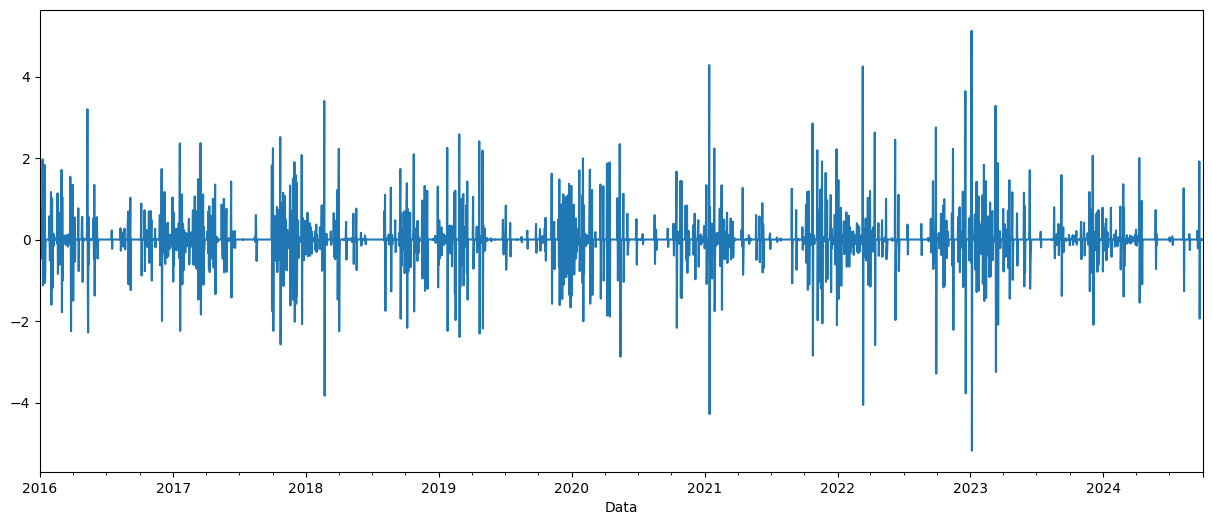

In [ ]:
df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].diff().plot(figsize=(15,6))

Modelo ARMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
arma_model = SARIMAX(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], order=(20, 2, 14), freq='D').fit()
MSE = (arma_model.resid ** 2).mean()
print("MSE:", MSE)
MAE = abs(arma_model.resid).mean()
print("MAE:", MAE)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 0.17262075889323333
MAE: 0.20796774224816897


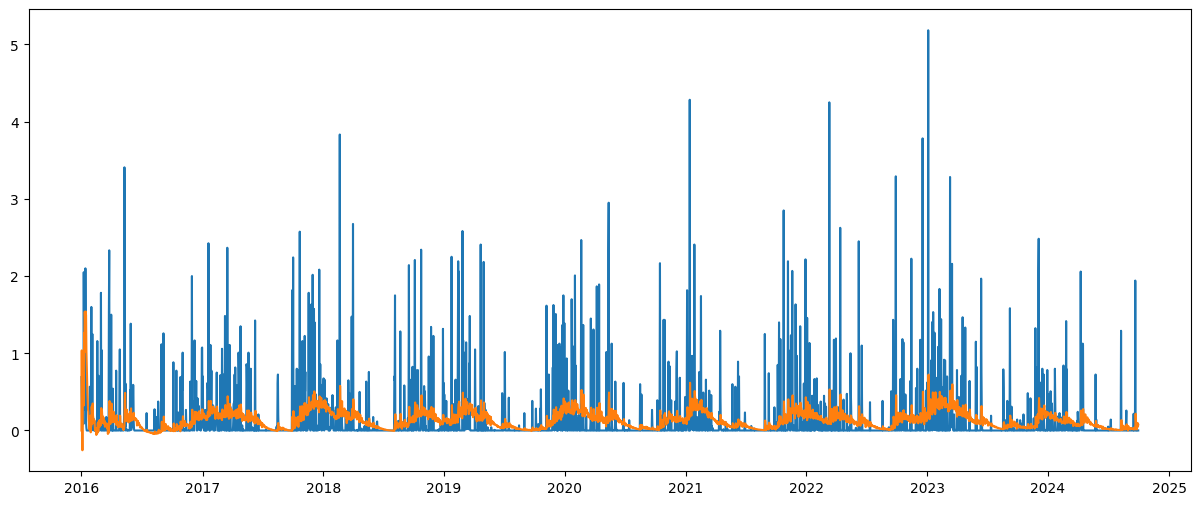

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])
plt.plot(arma_model.predict(type='levels'))

In [ ]:
arma_model.forecast(31)

,predicted_mean
2024-10-01,0.041500
2024-10-02,0.041482
2024-10-03,0.035754
2024-10-04,0.061573
2024-10-05,0.098101
2024-10-06,0.064827
2024-10-07,0.047250
2024-10-08,0.095369
2024-10-09,0.083241
2024-10-10,0.042471


Modelo Integrado Auto-regressivo de Média Móveis (ARIMA)

In [ ]:
#Previsão Diária
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], order=(20,1,14), freq='D').fit() # order=(p,i,q)
MSE = (arima.resid ** 2).mean()
print("MSE:", MSE)
MAE = abs(arima.resid).mean()
print("MAE:", MAE)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 0.1701637243545373
MAE: 0.2153617033814223


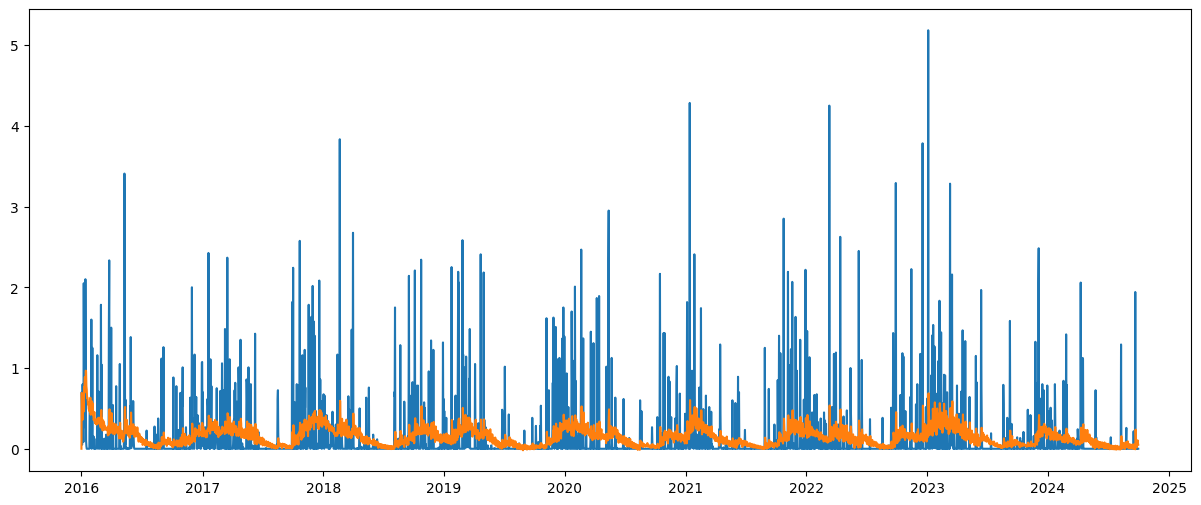

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])
plt.plot(arima.predict(type='levels'))
plt.savefig("modeloARIMA.pdf")

In [ ]:
arima.forecast(31)

,predicted_mean
2024-10-01,0.046431
2024-10-02,0.045836
2024-10-03,0.013955
2024-10-04,0.060101
2024-10-05,0.118300
2024-10-06,0.053581
2024-10-07,0.049505
2024-10-08,0.089059
2024-10-09,0.066887
2024-10-10,0.049742


In [ ]:
#Média Mensal
df_mes = df.resample('ME').mean()
arima = ARIMA(df_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], order=(20,1,14)).fit() # order=(p,i,q)
MSE = (arima.resid ** 2).mean()
print("MSE:", MSE)
MAE = abs(arima.resid).mean()
print("MAE:", MAE)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE: 0.010138639840784298
MAE: 0.07355723966414769


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


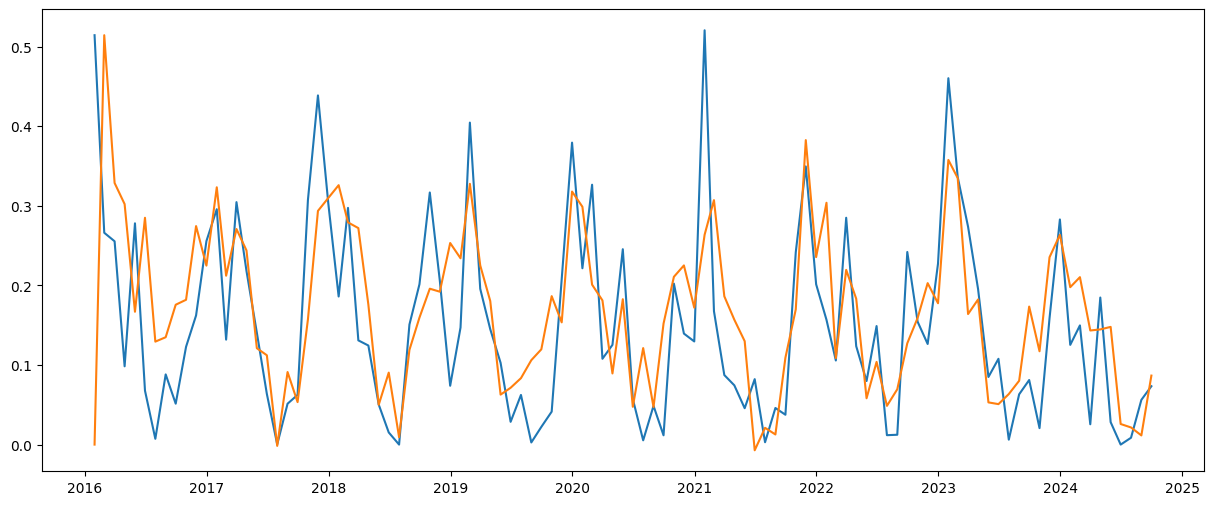

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])
plt.plot(arima.predict(type='levels'))
plt.savefig("modeloARIMA.pdf")

In [ ]:
arima.forecast(31)

,predicted_mean
2024-10-31,0.164522
2024-11-30,0.217499
2024-12-31,0.331180
2025-01-31,0.248207
2025-02-28,0.308512
2025-03-31,0.227601
2025-04-30,0.122621
2025-05-31,0.086143
2025-06-30,0.059259
2025-07-31,0.064355


SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], order=(1,1,1), seasonal_order=(1,0,1,12), freq='D').fit()
MSE = (sarima.resid ** 2).mean()
print("MSE:", MSE)
MAE = abs(sarima.resid).mean()
print("MAE:", MAE)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MSE: 0.17161821116616904
MAE: 0.21733292004648117


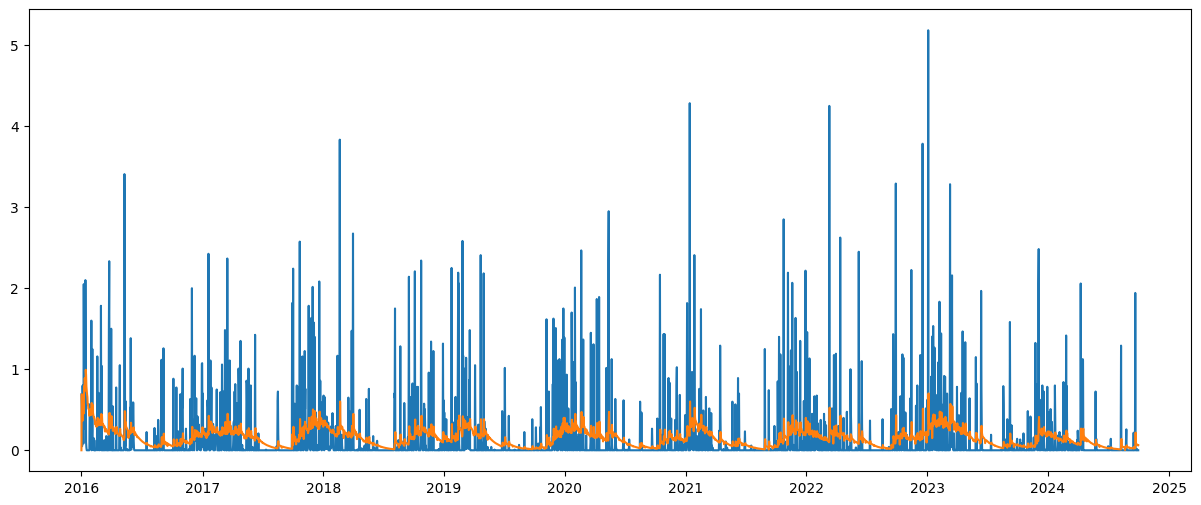

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])
plt.plot(sarima.predict(type='levels'))

In [ ]:
sarima.forecast(31)

,predicted_mean
2024-10-01,0.061098
2024-10-02,0.064680
2024-10-03,0.018015
2024-10-04,0.065601
2024-10-05,0.065602
2024-10-06,0.065602
2024-10-07,0.065602
2024-10-08,0.065192
2024-10-09,0.065602
2024-10-10,0.065142


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
df_mes = df.resample('ME').sum()
sarima = SARIMAX(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], order=(1,1,1), seasonal_order=(1,0,1,12)).fit()
MSE = (sarima.resid ** 2).mean()
print("MSE:", MSE)
MAE = abs(sarima.resid).mean()
print("MAE:", MAE)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MSE: 0.17161821116616904
MAE: 0.21733292004648117


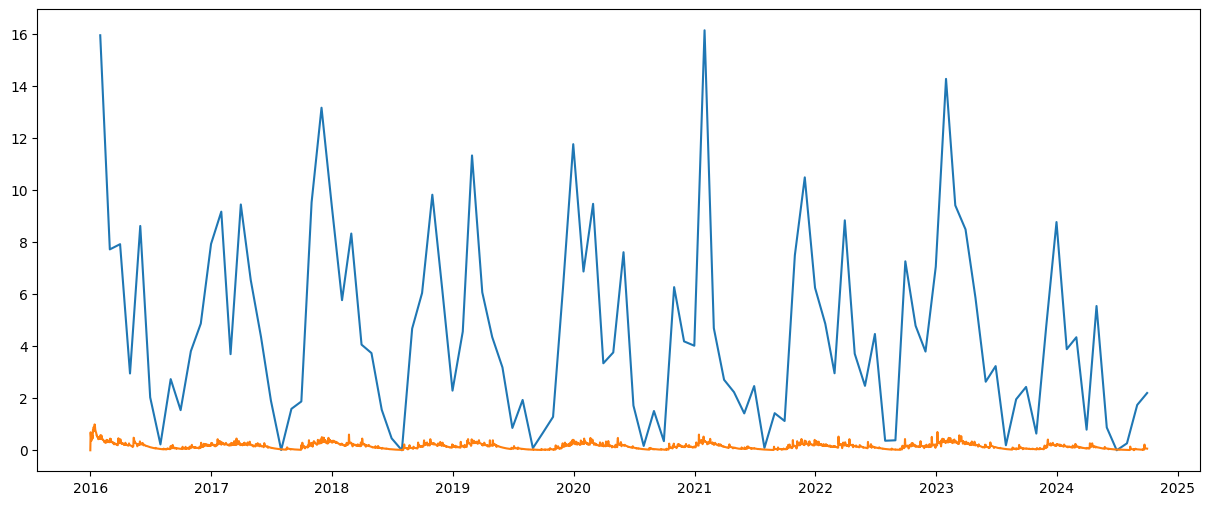

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])
plt.plot(sarima.predict(type='levels'))